In [1]:
from google.colab import files
uploaded = files.upload()

Saving id00b70b13.csv to id00b70b13.csv


In [5]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
full = pd.DataFrame()
part = pd.read_csv('id00b70b13.csv')
full = part 

In [7]:
train_1 = pd.DataFrame()
train_1['activity'] = full['activity']
train_1['lw_x'] = full['lw_x']
train_1['lw_y'] = full['lw_y']
train_1['lw_z'] = full['lw_z']

train = pd.DataFrame()
train = train_1[train_1['activity']!=99]

In [8]:
dataset = train
train = train.sample(frac = 0.8)
test = dataset.drop(train.index)

In [9]:
labels = ['moving', 'still']

In [31]:
def plot_confusion_matrix(confusion_matrix, classes):
    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis = 1)[:, np.newaxis]

    plt.imshow(confusion_matrix, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title('Normalized confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    threshold = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], '.2f'), horizontalalignment = "center", color = "white" if confusion_matrix[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, classes):
    results = dict()
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('Training time: ', results['training_time'], '\n')
    
    test_start_time = datetime.now()
    y_predicted = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('Testing time: ', results['testing_time'], '\n')
    results['predicted'] = y_predicted
   
    accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_predicted)
    results['accuracy'] = accuracy
    print('Accuracy: ', accuracy, '\n')

    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
    results['confusion_matrix'] = confusion_matrix

    plt.figure(figsize = (4, 4))
    plt.grid(b = False)
    plot_confusion_matrix(confusion_matrix, classes)
    plt.show()
    
    classification_report = metrics.classification_report(y_test, y_predicted)
    results['classification_report'] = classification_report
    
    results['model'] = model
    
    return results

In [29]:
X_train = pd.DataFrame()
X_train['lw_x'] = train['lw_x']
X_train['lw_y'] = train['lw_y']
X_train['lw_z'] = train['lw_z']
print(X_train)

y_train = pd.DataFrame()
y_train['activity'] = train['activity']
print(y_train)

         lw_x   lw_y   lw_z
251923 -0.949 -0.219  0.105
244475 -0.680  0.535 -0.527
58926   0.078 -1.527 -0.098
234785 -0.695  0.434 -0.496
71701   0.164 -1.613  0.227
...       ...    ...    ...
233231 -0.852  0.508 -0.473
192618 -0.883  0.398 -0.461
227925 -0.859  0.547 -0.191
181204 -0.887  0.176 -0.461
96115  -0.063 -0.984 -0.059

[159530 rows x 3 columns]
        activity
251923         4
244475         4
58926          1
234785         4
71701          1
...          ...
233231         4
192618         4
227925         4
181204         4
96115          1

[159530 rows x 1 columns]


In [13]:
X_test = pd.DataFrame()
X_test['lw_x'] = test['lw_x']
X_test['lw_y'] = test['lw_y']
X_test['lw_z'] = test['lw_z']
print(X_test)

y_test = pd.DataFrame()
y_test['activity'] = test['activity']
print(y_test)

         lw_x   lw_y   lw_z
26044   0.020 -0.965 -0.125
26045   0.020 -0.957 -0.121
26050  -0.008 -0.973 -0.172
26054  -0.043 -0.996 -0.184
26069  -0.055 -0.988 -0.180
...       ...    ...    ...
252294 -0.547  0.445 -0.730
252303 -0.113  0.574 -0.789
252305  0.031  0.625 -0.867
252309  0.129  0.691 -0.730
252313 -0.117  0.570 -0.789

[39882 rows x 3 columns]
        activity
26044         77
26045         77
26050         77
26054         77
26069         77
...          ...
252294        77
252303        77
252305        77
252309        77
252313        77

[39882 rows x 1 columns]


Training time:  0:00:04.524783 

Testing time:  0:00:00.005032 

Accuracy:  0.881199538638985 



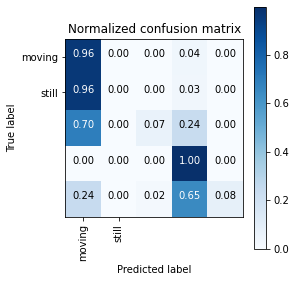

In [37]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action = 'ignore', category = ConvergenceWarning)

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2', 'l1']}
logistic_regression = linear_model.LogisticRegression()
logistic_regression_grid = GridSearchCV(logistic_regression, parameters, cv = 3, verbose = 1, n_jobs = -1)
logistic_regression_grid_results =  perform_model(logistic_regression, X_train, y_train, X_test, y_test, labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time:  0:23:57.211195 

Testing time:  0:00:00.006333 

Accuracy:  0.8771877037259916 



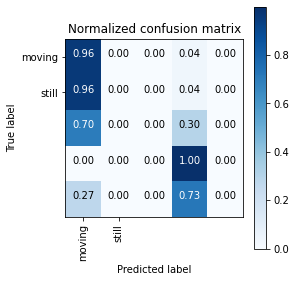

In [39]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
linear_svc = LinearSVC(tol = 0.00005)
linear_svc_grid = GridSearchCV(linear_svc, parameters, n_jobs = -1, verbose = 1)
linear_svc_grid_results = perform_model(linear_svc_grid, X_train, y_train, X_test, y_test, labels)

Training time:  2:46:16.926968 

Testing time:  0:01:08.568565 

Accuracy:  0.909834010330475 



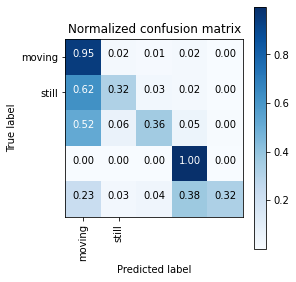

In [41]:
parameters = {'C':[2, 8, 16],'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel = 'rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid = parameters, n_jobs = -1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, labels)

Training time:  0:00:05.082787 

Testing time:  0:00:00.007103 

Accuracy:  0.9071510957324106 



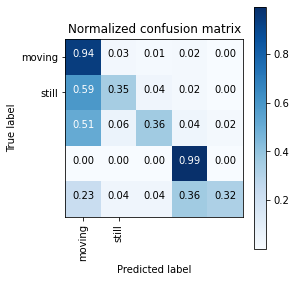

In [42]:
parameters = {'max_depth':np.arange(3, 10, 2)}
decision_tree = DecisionTreeClassifier()
decision_tree_grid = GridSearchCV(decision_tree, parameters, n_jobs = -1)
decision_tree_grid_results = perform_model(decision_tree_grid, X_train, y_train, X_test, y_test, labels)

Training time:  0:33:25.187448 

Testing time:  0:00:00.665097 

Accuracy:  0.9131187001654882 



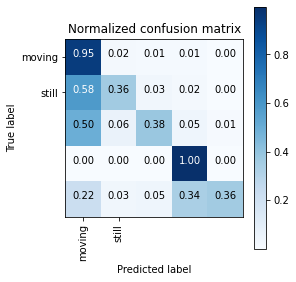

In [43]:
params = {'n_estimators': np.arange(10, 201, 20), 'max_depth': np.arange(3, 15, 2)}
random_forest = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest, params, n_jobs = -1)
random_forest_grid_results = perform_model(random_forest_grid, X_train, y_train, X_test, y_test, labels)

In [44]:
print('Accuracy: \n\n')
print('Logistic regression: ', logistic_regression_grid_results['accuracy']*100, '%')
print('Linear SVC: ', linear_svc_grid_results['accuracy']*100, '%')
print('RBF SVM Classifier: ', rbf_svm_grid_results['accuracy']*100, '%')
print('Decision Tree: ', decision_tree_grid_results['accuracy']*100, '%')
print('Random Forest: ', random_forest_grid_results['accuracy']*100, '%')

Accuracy: 


Logistic regression:  88.1199538638985 %
Linear SVC:  87.71877037259917 %
RBF SVM Classifier:  90.9834010330475 %
Decision Tree:  90.71510957324107 %
Random Forest:  91.31187001654882 %
